In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
image_path = '/content/image b.jpg'
image = cv2.imread(image_path)

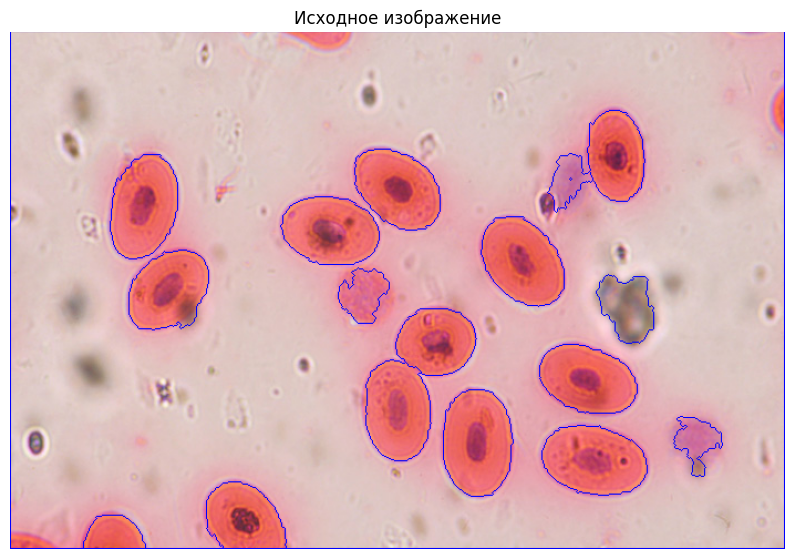

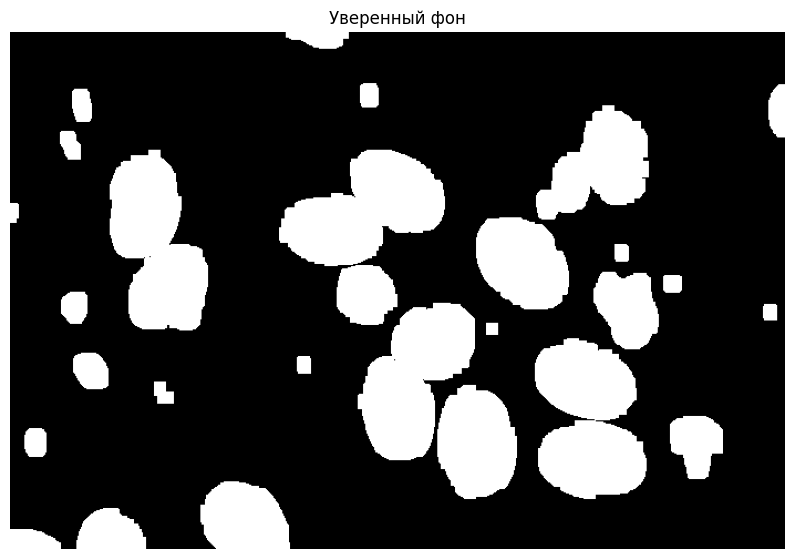

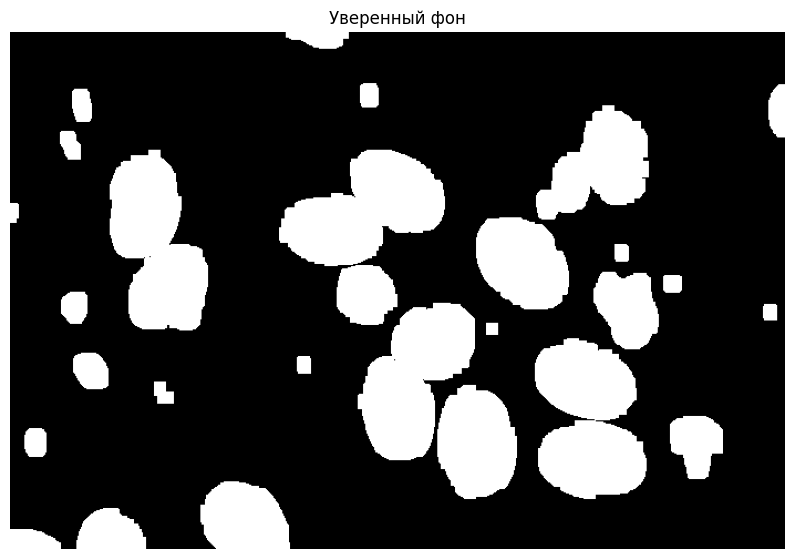

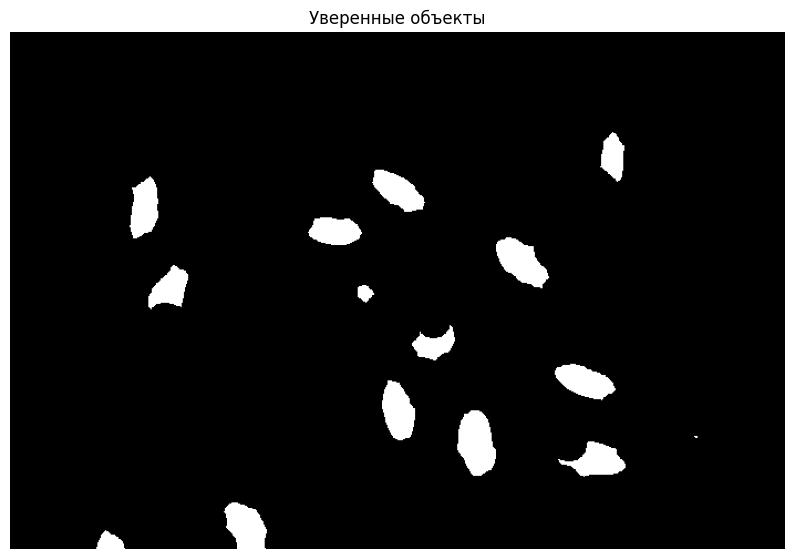

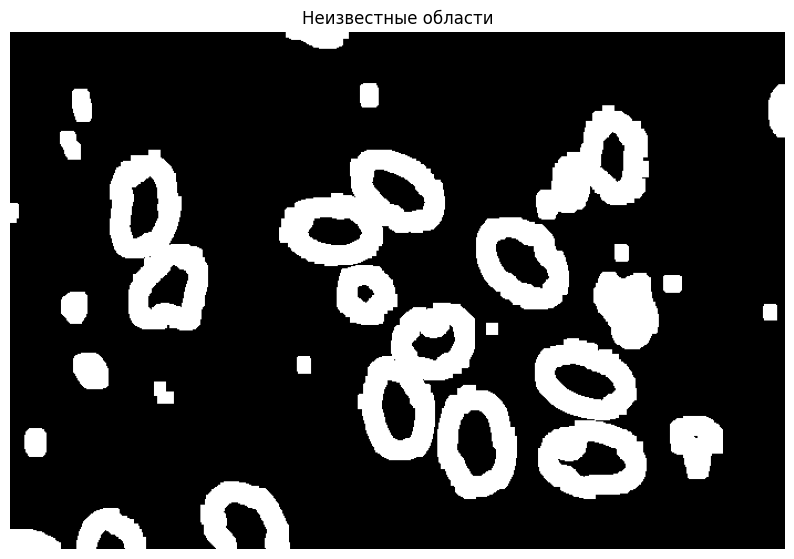

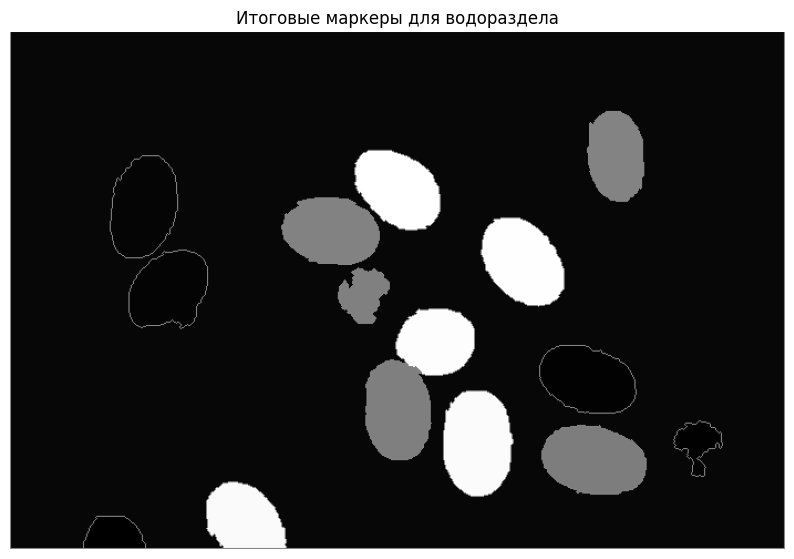

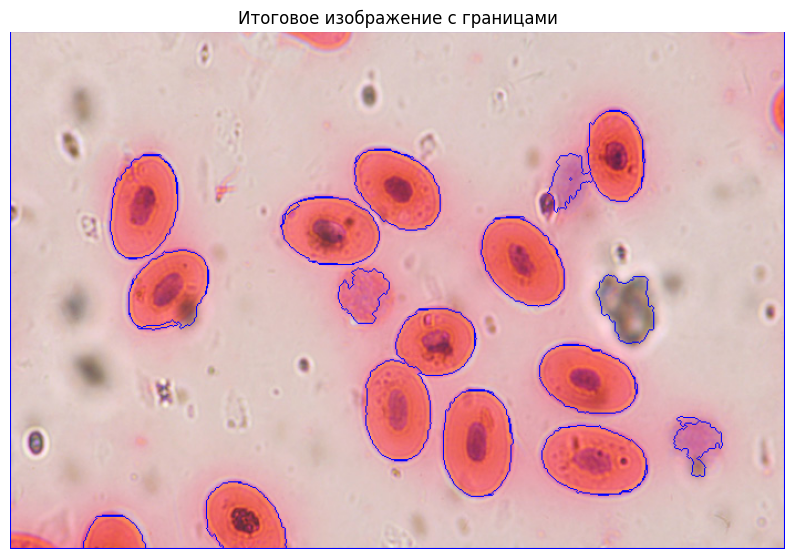

In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image("Исходное изображение", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
show_image("Уверенный фон", sure_bg)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)

show_image("Уверенный фон", sure_bg)
show_image("Уверенные объекты", sure_fg)
show_image("Неизвестные области", unknown)
show_image("Итоговые маркеры для водораздела", markers.astype(np.uint8) * 85)

image[markers == -1] = [255, 0, 0]
show_image("Итоговое изображение с границами", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [18]:
image_path = '/content/image b.jpg'
image = cv2.imread(image_path)

In [ ]:

import numpy as np
from collections import deque

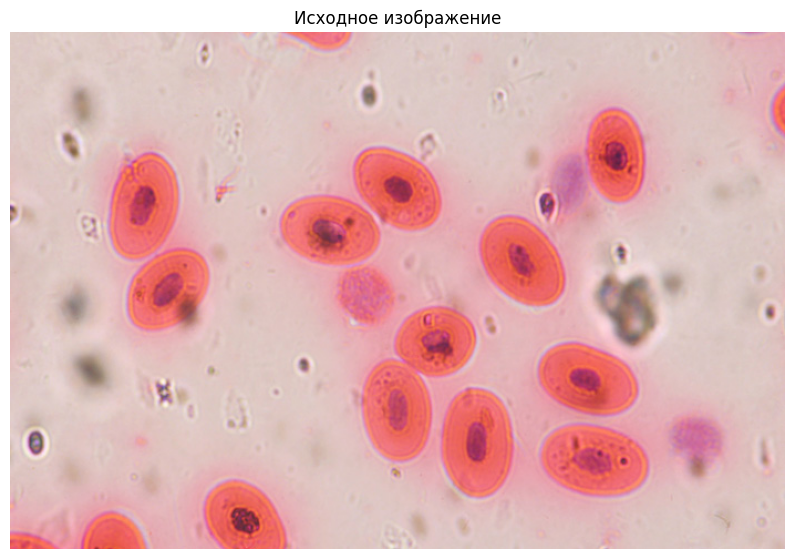

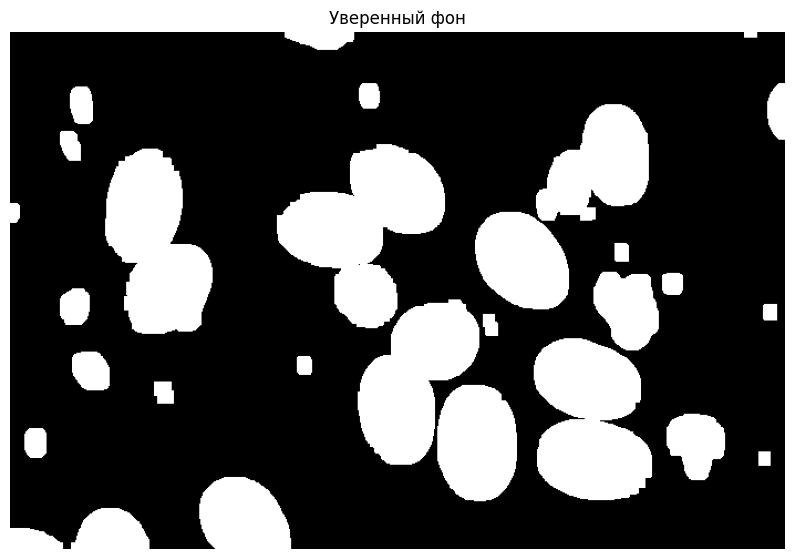

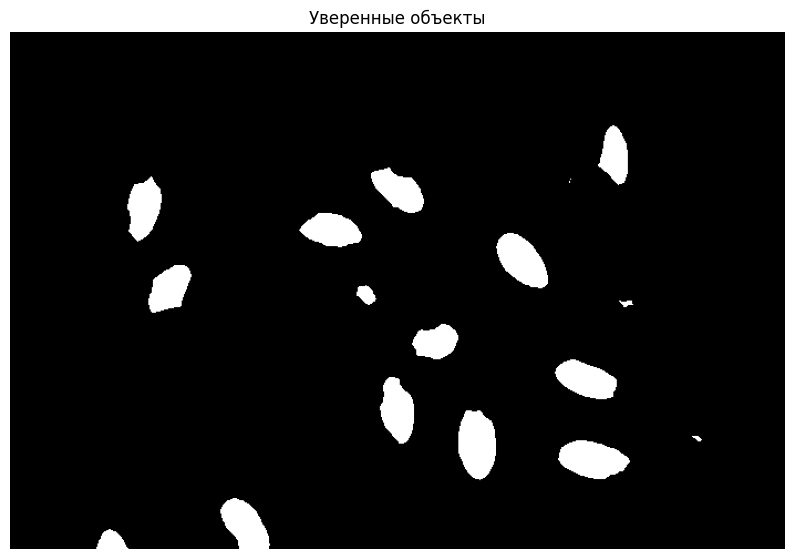

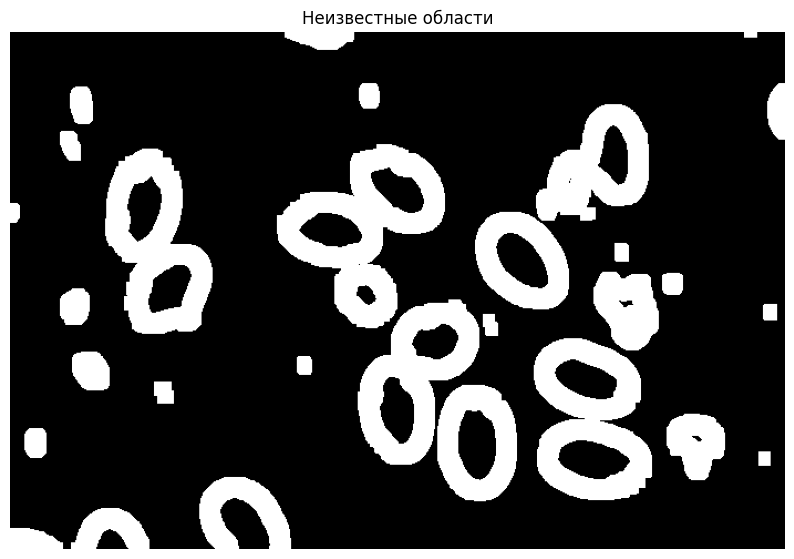

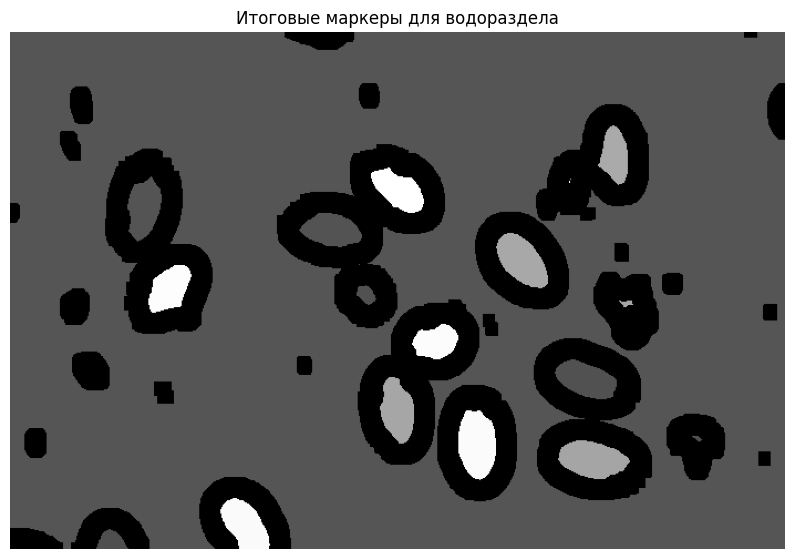

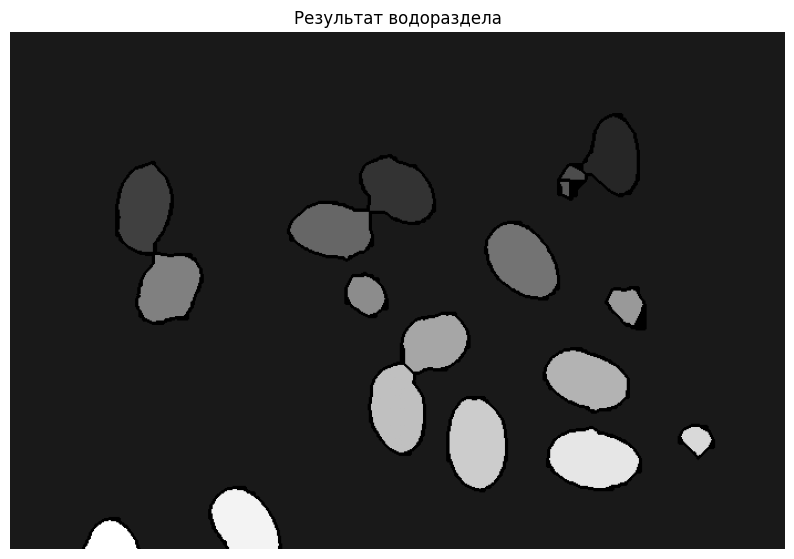

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image("Исходное изображение", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

def watershed_algorithm(height_map, markers):
    # Размеры изображения
    h, w = height_map.shape

    # Результирующие метки (маркеры)
    labels = markers.copy()

    # Направления для перемещения к соседям (4-связность)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Очередь с приоритетом
    queue = deque()

    # Инициализация очереди начальными маркерами
    # Если это маркер
    # Добавляем в очередь
    for y in range(h):
        for x in range(w):
            if markers[y, x] > 0:
                queue.append((height_map[y, x], y, x))

    # Сортируем очередь по высоте пикселей (имитируем приоритет)
    queue = deque(sorted(queue))

    # Обработка очереди
    while queue:
        _, y, x = queue.popleft()

        # Проверяем соседей
        for dy, dx in directions:
            ny, nx = y + dy, x + dx

            # Проверяем границы изображения
            if 0 <= ny < h and 0 <= nx < w:
                # Если пиксель ещё не размечен
                if labels[ny, nx] == 0:
                    labels[ny, nx] = labels[y, x]
                    queue.append((height_map[ny, nx], ny, nx))
                # Если пиксель размечен другим маркером, он становится линией водораздела
                elif labels[ny, nx] != labels[y, x]:
                    labels[ny, nx] = -1  # -1 обозначает линию водораздела

    return labels

segmented_labels = watershed_algorithm(dist_transform, markers)

show_image("Уверенный фон", sure_bg)
show_image("Уверенные объекты", sure_fg)
show_image("Неизвестные области", unknown)
show_image("Итоговые маркеры для водораздела", markers.astype(np.uint8) * 85)


image[markers == -1] = [255, 0, 0]
show_image("Результат водораздела", segmented_labels)